# 1.Importing Lib

In [79]:
import pandas as pd

urban = pd.read_csv('S:/Hackathons/EY/datasets/selected/urban.csv')
immunization_percent = pd.read_csv('S:/Hackathons/EY/datasets/selected/immunization_percent.csv')
cold_data = pd.read_csv('S:/Hackathons/EY/datasets/selected/cold_data1.csv')
age = pd.read_csv('S:/Hackathons/EY/datasets/selected/age.csv')
households = pd.read_csv('S:/Hackathons/EY/datasets/selected/hh.csv')
state_pop = pd.read_csv('S:/Hackathons/EY/datasets/selected/state_pop.csv') 

dist_data = pd.read_csv('S:/Hackathons/EY/datasets/selected/dist_data.csv')

In [80]:
print(urban.shape)
print(immunization_percent.shape)
print(cold_data.shape)
print(age.shape)
print(households.shape)

(35, 2)
(35, 2)
(35, 3)
(35, 2)
(35, 3)


# 2.Merging States

In [81]:
temp = pd.merge(urban,immunization_percent,on = 'state')
temp.shape
temp = pd.merge(temp,cold_data,on = 'state')
temp.shape
temp = pd.merge(temp,age,on = 'state')
temp.shape
temp = pd.merge(temp,households,on = 'state')
temp.shape
temp = pd.merge(temp,state_pop,on = 'state')
temp.shape


(35, 9)

In [82]:
temp.head()

,state,pect_urban,full_imm_percent,Cold Chain Points,cap_lit,percent_elderly,more_than_4,more_than_4_prop,state_pop
0,Andaman and Nicobar Islands,37.702355,83.6,40,21275,6.7,29348,0.078844,379944.0
1,Andhra Pradesh,33.363462,66.7,1650,597975,9.8,3318910,0.079750,42332781.5
2,Arunachal Pradesh,22.935810,13.3,193,81850,4.6,143832,0.107582,1382611.0
3,Assam,14.095372,50.7,792,300000,6.7,3288647,0.105963,31169272.0
4,Bihar,11.294984,41.4,678,440925,7.4,11767291,0.113378,103804637.0


In [83]:
temp.columns

Index(['state', 'pect_urban', 'full_imm_percent', 'Cold Chain Points',
       'cap_lit', 'percent_elderly', 'more_than_4', 'more_than_4_prop',
       'state_pop'],
      dtype='object')

# 3.Preprocess Columns

In [84]:
temp['state_pop_10000s'] = temp['state_pop'] /10000


In [85]:
state_data = temp.copy()

state_data['hh_more_than_4_per_10000s'] = state_data['more_than_4']/state_data['state_pop_10000s']
state_data['cold_chain_points_per_10000s'] = state_data['Cold Chain Points']/state_data['state_pop_10000s']
state_data['storage_cap_lit_per_10000s'] = state_data['Cold Chain Points']/state_data['state_pop_10000s']

state_data.drop(columns = ['state_pop','state_pop_10000s','cap_lit','more_than_4_prop','more_than_4','Cold Chain Points'],inplace = True)

state_data.head()

,state,pect_urban,full_imm_percent,percent_elderly,hh_more_than_4_per_10000s,cold_chain_points_per_10000s,storage_cap_lit_per_10000s
0,Andaman and Nicobar Islands,37.702355,83.6,6.7,772.429621,1.052787,1.052787
1,Andhra Pradesh,33.363462,66.7,9.8,784.004708,0.389769,0.389769
2,Arunachal Pradesh,22.935810,13.3,4.6,1040.292606,1.395910,1.395910
3,Assam,14.095372,50.7,6.7,1055.092657,0.254096,0.254096
4,Bihar,11.294984,41.4,7.4,1133.599745,0.065315,0.065315


In [88]:
state_data.dtypes
state_data.to_csv('S:/Hackathons/EY/datasets/state_data.csv',index = False)
temp1 =state_data.drop(columns = 'state').astype(float)

# 4.Distribution Plot 

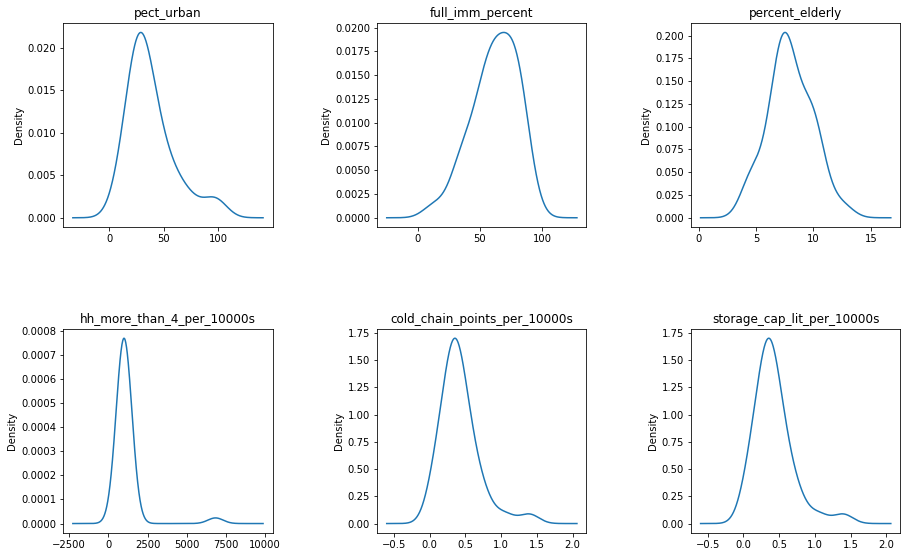

In [51]:
x =list(temp1.columns)

titles = temp1.columns

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,15))
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

for i,j,title in zip(range(1,8),x,titles):
    ax = fig.add_subplot(3, 3, i)
    dist_comp = temp1[j].plot(kind = 'kde',ax = ax,title = title)

In [52]:
state_data.columns

Index(['state', 'pect_urban', 'full_imm_percent', 'percent_elderly',
       'hh_more_than_4_per_10000s', 'cold_chain_points_per_10000s',
       'storage_cap_lit_per_10000s'],
      dtype='object')

In [53]:
state_data

,state,pect_urban,full_imm_percent,percent_elderly,hh_more_than_4_per_10000s,cold_chain_points_per_10000s,storage_cap_lit_per_10000s
0,Andaman and Nicobar Islands,37.702355,83.6,6.7,772.429621,1.052787,1.052787
1,Andhra Pradesh,33.363462,66.7,9.8,784.004708,0.389769,0.389769
2,Arunachal Pradesh,22.935810,13.3,4.6,1040.292606,1.395910,1.395910
3,Assam,14.095372,50.7,6.7,1055.092657,0.254096,0.254096
4,Bihar,11.294984,41.4,7.4,1133.599745,0.065315,0.065315
5,Chandigarh,97.253210,73.0,6.4,908.099662,0.483556,0.483556
6,Chhattisgarh,23.242086,59.3,7.8,1028.545357,0.246670,0.246670
7,Dadra and Nagar Haveli and Daman and Diu,58.513074,69.4,4.3,6838.197636,0.358506,0.358506
8,Goa,62.172508,89.8,11.2,846.196431,0.281261,0.281261
9,Gujarat,42.596317,54.8,7.9,1069.328594,0.379407,0.379407


## Merging districtwise with state  data

In [54]:
dist_data.head()

,state,District_Key,dust_pop,area,density,confirmed,active,recovered,deceased,migrated_other,state_pop,district,morbidity_percent
0,Andhra Pradesh,AP_Anantapur,4540646.280,19130.0,237.357359,67121,149,66377,595,0,42332781.5,Anantapur,23.5
1,Andhra Pradesh,AP_Chittoor,4637560.416,15152.0,306.069193,85381,452,84092,837,0,42332781.5,Chittoor,25.8
2,Andhra Pradesh,AP_East Godavari,5728522.488,10807.0,530.075182,123267,489,122142,636,0,42332781.5,East Godavari,24.5
3,Andhra Pradesh,AP_Guntur,5436823.760,11391.0,477.291174,74228,621,72947,660,0,42332781.5,Guntur,29.2
4,Andhra Pradesh,AP_Kadapa,3207590.688,15359.0,208.841115,54774,122,54197,455,0,42332781.5,Kadapa,27.8


# Preprocessing District Data

In [59]:
dist_data1 = dist_data.copy()
dist_data1.columns

Index(['state', 'District_Key', 'dust_pop', 'area', 'density', 'confirmed',
       'active', 'recovered', 'deceased', 'migrated_other', 'state_pop',
       'district', 'morbidity_percent'],
      dtype='object')

In [60]:
# scale district pop

dist_data1['dist_pop_in_10000s'] = dist_data1['dust_pop']/10000

dist_data1 = dist_data1[['dist_pop_in_10000s','District_Key','density','confirmed',
       'active', 'recovered', 'deceased', 'migrated_other','morbidity_percent','state']]

In [61]:
dist_data1.head()

,dist_pop_in_10000s,District_Key,density,confirmed,active,recovered,deceased,migrated_other,morbidity_percent,state
0,454.064628,AP_Anantapur,237.357359,67121,149,66377,595,0,23.5,Andhra Pradesh
1,463.756042,AP_Chittoor,306.069193,85381,452,84092,837,0,25.8,Andhra Pradesh
2,572.852249,AP_East Godavari,530.075182,123267,489,122142,636,0,24.5,Andhra Pradesh
3,543.682376,AP_Guntur,477.291174,74228,621,72947,660,0,29.2,Andhra Pradesh
4,320.759069,AP_Kadapa,208.841115,54774,122,54197,455,0,27.8,Andhra Pradesh


# merge district and state

In [63]:
merged = pd.merge(state_data,dist_data1[['dist_pop_in_10000s','District_Key','density','confirmed',
       'active', 'recovered', 'deceased', 'migrated_other','morbidity_percent','state']],on = 'state')
merged.head(5)

,state,pect_urban,full_imm_percent,percent_elderly,hh_more_than_4_per_10000s,cold_chain_points_per_10000s,storage_cap_lit_per_10000s,dist_pop_in_10000s,District_Key,density,confirmed,active,recovered,deceased,migrated_other,morbidity_percent
0,Andaman and Nicobar Islands,37.702355,83.6,6.7,772.429621,1.052787,1.052787,4.096830,AN_Nicobar,22.253288,0,0,0,0,0,14.00
1,Andaman and Nicobar Islands,37.702355,83.6,6.7,772.429621,1.052787,1.052787,11.742386,AN_North and Middle Andaman,31.430370,1,0,1,0,0,23.55
2,Andaman and Nicobar Islands,37.702355,83.6,6.7,772.429621,1.052787,1.052787,26.481390,AN_South Andaman,99.107000,51,19,32,0,0,33.10
3,Andhra Pradesh,33.363462,66.7,9.8,784.004708,0.389769,0.389769,454.064628,AP_Anantapur,237.357359,67121,149,66377,595,0,23.50
4,Andhra Pradesh,33.363462,66.7,9.8,784.004708,0.389769,0.389769,463.756042,AP_Chittoor,306.069193,85381,452,84092,837,0,25.80


# percents to numbers

In [65]:
merged.columns

Index(['state', 'pect_urban', 'full_imm_percent', 'percent_elderly',
       'hh_more_than_4_per_10000s', 'cold_chain_points_per_10000s',
       'storage_cap_lit_per_10000s', 'dist_pop_in_10000s', 'District_Key',
       'density', 'confirmed', 'active', 'recovered', 'deceased',
       'migrated_other', 'morbidity_percent'],
      dtype='object')

In [67]:
numb_dist_data = merged[['state','District_Key','confirmed', 'active', 'recovered', 'deceased','migrated_other','density']]

In [68]:
numb_dist_data['urbans'] = merged['pect_urban']*0.01*merged['dist_pop_in_10000s']
numb_dist_data['full_immunes'] = merged['full_imm_percent']*0.01*merged['dist_pop_in_10000s']
numb_dist_data['elderlies'] = merged['percent_elderly']*0.01*merged['dist_pop_in_10000s']
numb_dist_data['hh_more_than_4'] = merged['hh_more_than_4_per_10000s']*0.01*merged['dist_pop_in_10000s']
numb_dist_data['cold_chain_points'] = merged['cold_chain_points_per_10000s']*0.01*merged['dist_pop_in_10000s']
numb_dist_data['storage_cap_lits'] = merged['storage_cap_lit_per_10000s']*0.01*merged['dist_pop_in_10000s']

<ipython-input-68-e56620338d33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numb_dist_data['urbans'] = merged['pect_urban']*0.01*merged['dist_pop_in_10000s']
<ipython-input-68-e56620338d33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numb_dist_data['full_immunes'] = merged['full_imm_percent']*0.01*merged['dist_pop_in_10000s']
<ipython-input-68-e56620338d33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [69]:
numb_dist_data.head()

,state,District_Key,confirmed,active,recovered,deceased,migrated_other,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits
0,Andaman and Nicobar Islands,AN_Nicobar,0,0,0,0,0,22.253288,1.544602,3.424950,0.274488,31.645132,0.043131,0.043131
1,Andaman and Nicobar Islands,AN_North and Middle Andaman,1,0,1,0,0,31.430370,4.427156,9.816635,0.786740,90.701671,0.123622,0.123622
2,Andaman and Nicobar Islands,AN_South Andaman,51,19,32,0,0,99.107000,9.984108,22.138442,1.774253,204.550104,0.278793,0.278793
3,Andhra Pradesh,AP_Anantapur,67121,149,66377,595,0,237.357359,151.491677,302.861107,44.498334,3559.888061,1.769803,1.769803
4,Andhra Pradesh,AP_Chittoor,85381,452,84092,837,0,306.069193,154.725069,309.325280,45.448092,3635.869200,1.807577,1.807577


In [70]:
numb_dist_data.to_csv('S:/Hackathons/EY/results/unscaled_dist_data.csv',index = False)

In [71]:
numb_dist_data.columns

Index(['state', 'District_Key', 'confirmed', 'active', 'recovered', 'deceased',
       'migrated_other', 'density', 'urbans', 'full_immunes', 'elderlies',
       'hh_more_than_4', 'cold_chain_points', 'storage_cap_lits'],
      dtype='object')

# Scaling

In [74]:
numb_dist_data1 = numb_dist_data.copy()

from sklearn.preprocessing import MinMaxScaler
mms1 = MinMaxScaler()
mms2 = MinMaxScaler()
mms3 = MinMaxScaler()
mms4 = MinMaxScaler()
mms5 = MinMaxScaler()
mms6 = MinMaxScaler()

density_scaler = MinMaxScaler(feature_range = (0,1.2))
cases_scaler1 = MinMaxScaler(feature_range = (0,1.5))
cases_scaler2 = MinMaxScaler(feature_range = (0,1.5))
cases_scaler3 = MinMaxScaler(feature_range = (0,1.5))
cases_scaler4 = MinMaxScaler(feature_range = (0,1.5))


numb_dist_data1['urbans'] = mms1.fit_transform(numb_dist_data1[['urbans']])
numb_dist_data1['full_immunes'] = mms2.fit_transform(numb_dist_data1[['full_immunes']])
numb_dist_data1['elderlies'] = mms3.fit_transform(numb_dist_data1[['elderlies']])
numb_dist_data1['hh_more_than_4'] = mms4.fit_transform(numb_dist_data1[['hh_more_than_4']])
numb_dist_data1['cold_chain_points'] = mms5.fit_transform(numb_dist_data1[['cold_chain_points']])
numb_dist_data1['storage_cap_lits'] = mms6.fit_transform(numb_dist_data1[['storage_cap_lits']])


numb_dist_data1['density'] = density_scaler.fit_transform(numb_dist_data1[['density']])
numb_dist_data1['active'] = cases_scaler1.fit_transform(numb_dist_data1[['active']])
numb_dist_data1['confirmed'] = cases_scaler2.fit_transform(numb_dist_data1[['confirmed']])
numb_dist_data1['recovered'] = cases_scaler3.fit_transform(numb_dist_data1[['recovered']])
numb_dist_data1['deceased'] = cases_scaler4.fit_transform(numb_dist_data1[['deceased']])

In [75]:
numb_dist_data1.columns

Index(['state', 'District_Key', 'confirmed', 'active', 'recovered', 'deceased',
       'migrated_other', 'density', 'urbans', 'full_immunes', 'elderlies',
       'hh_more_than_4', 'cold_chain_points', 'storage_cap_lits'],
      dtype='object')

In [76]:
numb_dist_data1.head()

,state,District_Key,confirmed,active,recovered,deceased,migrated_other,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits
0,Andaman and Nicobar Islands,AN_Nicobar,0.000000,0.000704,0.000000,0.000000,0,0.000504,0.002414,0.003897,0.001921,0.001865,0.006166,0.006166
1,Andaman and Nicobar Islands,AN_North and Middle Andaman,0.000004,0.000704,0.000004,0.000000,0,0.000721,0.007598,0.011429,0.006130,0.006770,0.022285,0.022285
2,Andaman and Nicobar Islands,AN_South Andaman,0.000200,0.001076,0.000130,0.000000,0,0.002323,0.017593,0.025948,0.014243,0.016226,0.053358,0.053358
3,Andhra Pradesh,AP_Anantapur,0.263420,0.003618,0.270190,0.081284,0,0.005595,0.272112,0.356739,0.365251,0.294924,0.351934,0.351934
4,Andhra Pradesh,AP_Chittoor,0.335082,0.009545,0.342299,0.114344,0,0.007221,0.277927,0.364356,0.373053,0.301235,0.359499,0.359499


In [77]:
numb_dist_data1.to_csv('S:/Hackathons/EY/results/scaled_dist_data.csv',index = False)